In [ ]:
# install dependencies
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark 

In [2]:
# set enviroment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# install pyspark
!pip install pyspark==3.1.2

In [ ]:
!cat /proc/cpuinfo

In [5]:
# create spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [6]:
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)

In [7]:
# download dataset
import pandas as pd
url_github = 'https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv'
df = pd.read_csv(url_github)



In [ ]:
df

In [ ]:
# check type of df
type(df)

pandas.core.frame.DataFrame

In [9]:
# download data from df to retail.csv
df.to_csv('retail.csv',header=True,index = False)

# ***Data Profiling***

In [10]:
 # download data to retail_data 
 retail_data = spark.read.csv('/content/retail.csv',header = True, inferSchema = True,) 

In [ ]:
# check retail_data
retail_data.show()

In [ ]:
# check data type
retail_data.dtypes

In [ ]:
# check data type
retail_data.printSchema()

In [14]:
# นับจำนวน row และ column
print((retail_data.count(), len(retail_data.columns)))

(541909, 8)


In [15]:
# สรุปข้อมูลสถิติโดยใช้ describe
retail_data.describe().show()

+-------+------------------+------------------+--------------------+-----------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|         Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+-----------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|           541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0| 9.55224954743324|           null| 4.61111362608297|15287.690570239585|       null|
| stddev|13428.417280804775|16799.737628427683|                null|218.0811578502348|           null|96.75985306117948| 1713.600303321591|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|           -80995|1/

In [ ]:
# สรุปข้อมูลสถิติโดยใช้ summary
retail_data.summary().show()

+-------+------------------+------------------+--------------------+-----------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|         Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+-----------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|           541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0| 9.55224954743324|           null| 4.61111362608297|15287.690570239585|       null|
| stddev|13428.417280804775|16799.737628427683|                null|218.0811578502348|           null|96.75985306117948| 1713.600303321591|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|           -80995|1/

In [ ]:
# นับจำนวนแถว
retail_data.summary("count").show()

+-------+---------+---------+-----------+--------+-----------+---------+----------+-------+
|summary|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+-------+---------+---------+-----------+--------+-----------+---------+----------+-------+
|  count|   541909|   541909|     540455|  541909|     541909|   541909|    406829| 541909|
+-------+---------+---------+-----------+--------+-----------+---------+----------+-------+



# **สังเกตุว่า column Description และ Customer มีจำนวน row ไม่เท่า row อื่นๆ**

# **หา Missingvalue**

In [ ]:
# check missing value จาก column CustomerID
retail_data.where( retail_data.CustomerID.isNull() ).count()

135080

In [ ]:
# check missing value จาก column Description
retail_data.where( retail_data.Description.isNull() ).count()

1454

In [16]:
# ดูข้อมูลคร่าวๆที่ customerID นั้น Null
retail_data.filter( retail_data.CustomerID.isNull() ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536414|    22139|                null|      56|12/1/2010 11:52|      0.0|      null|United Kingdom|
|   536544|    21773|DECORATIVE ROSE B...|       1|12/1/2010 14:32|     2.51|      null|United Kingdom|
|   536544|    21774|DECORATIVE CATS B...|       2|12/1/2010 14:32|     2.51|      null|United Kingdom|
|   536544|    21786|  POLKADOT RAIN HAT |       4|12/1/2010 14:32|     0.85|      null|United Kingdom|
|   536544|    21787|RAIN PONCHO RETRO...|       2|12/1/2010 14:32|     1.66|      null|United Kingdom|
|   536544|    21790|  VINTAGE SNAP CARDS|       9|12/1/2010 14:32|     1.66|      null|United Kingdom|
|   536544|    21791|VINTAGE HEADS AND...|       2|12/1/2010 14:

In [ ]:
# ดูข้อมูลคร่าวๆที่ Desciption นั้น Null 
retail_data.filter( retail_data.Description.isNull() ).show()

In [18]:
# นับประเทศทั้งหมด
retail_data.select('Country').distinct().count()

38

In [ ]:
# ดูประเทศทั้งหมด
retail_data.select('Country').distinct().sort(retail_data.Country).show(38)

In [ ]:
# นับ Description ทั้งหมดที่ไม่ซ้ำกัน
retail_data.select('Description').distinct().count()

4224

In [ ]:
# นับ Description ทั้งหมด
retail_data.groupBy("Description").count().show()

# **Graphical EDA - Exploratory Data Analysis**

In [ ]:
# import dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# convert to pandasdataframe
retail_pd = retail_data.toPandas()

<Axes: xlabel='Quantity'>

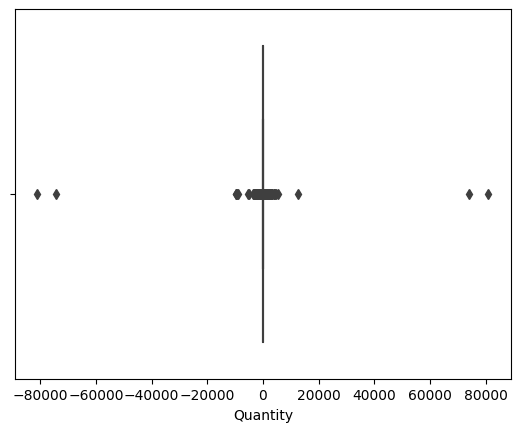

In [ ]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลขและหา outlier
sns.boxplot(x = retail_pd['Quantity'])

<Axes: xlabel='UnitPrice'>

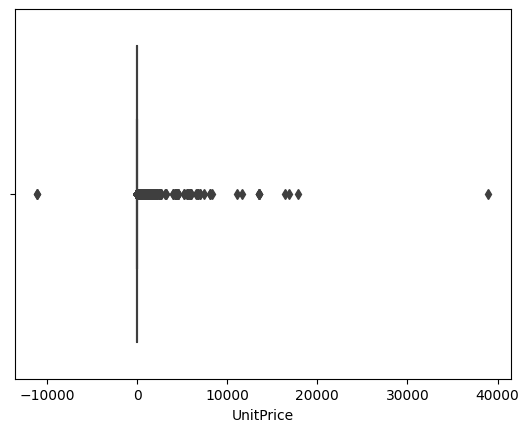

In [ ]:
sns.boxplot(x = retail_pd['UnitPrice'])

# **semantic Anomalies**

# **จากที่เราสังเกตุจาก summary เราเห็นว่า quantity กับ unitprice ไม่ควรจะติดลบดังนั้นเราจะมาดูข้อมูลกัน**

In [ ]:
# check quantity ที่น้อยกว่า 0
retail_data.filter(retail_data['Quantity'] < 0).show()

In [ ]:
# นับจำนวน quantity ที่น้อยกว่า 0
retail_data.filter(retail_data['Quantity'] < 0).count()

10624

In [ ]:
# check unitprice ที่น้อยกว่า 0
retail_data.filter(retail_data['UnitPrice'] < 0).show()

+---------+---------+---------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|    Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+---------------+--------+---------------+---------+----------+--------------+
|  A563186|        B|Adjust bad debt|       1|8/12/2011 14:51|-11062.06|      null|United Kingdom|
|  A563187|        B|Adjust bad debt|       1|8/12/2011 14:52|-11062.06|      null|United Kingdom|
+---------+---------+---------------+--------+---------------+---------+----------+--------------+



In [ ]:
# นับจำนวน unitprice ที่น้อยกว่า 0
retail_data.filter(retail_data['UnitPrice'] < 0).count()

2

In [ ]:
# ตรวจสอบ format ของ InvoiceNo ว่าเป็นอย่างไร
retail_data.select('InvoiceNo').show(100)

# **เราได้สมมุติว่า InvoiceNo นั้นควรจะเป็นตัวเลขจำนวน 6 หลักเท่านั้น**

In [ ]:
# check จำนวน InvoiceNO ที่มี format ตรงกับที่กำหนดโดยใช้ rlike
retail_data.where(retail_data["InvoiceNo"].rlike("^[0-9]{6}$")).count()

532618

In [ ]:
# check  InvoiceNO ที่มี format ตรงกับที่กำหนดโดยใช้ rlike
retail_data.where(retail_data["InvoiceNo"].rlike("^[0-9]{6}$")).show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [ ]:
# check จำนวน InvoiceNO ที่มี format ไม่ตรงกับที่กำหนดโดยใช้ rlike
retail_data.where(~retail_data["InvoiceNo"].rlike("^[0-9]{6}$")).count()

9291

In [ ]:
# check  InvoiceNO ที่มี format ไม่ตรงกับที่กำหนดโดยใช้ rlike
retail_data.where(~retail_data["InvoiceNo"].rlike("^[0-9]{6}$")).show()

In [ ]:
# ลองใช้ sparksql  
retail_data.createOrReplaceTempView("data")
retail_sql = spark.sql("SELECT * FROM data")
retail_sql.show()

In [24]:
# บันทึก InvoiceNO ที่มี format ไม่ตรง
invoice_notmatch = spark.sql("SELECT * FROM data WHERE InvoiceNo NOT RLIKE '^[0-9]{6}$' ")

In [ ]:
# นับจำนวน InvoiceNO ที่มี format ไม่ตรง
invoice_notmatch.count()

9291

In [ ]:
# แสดง InvoiceNO ที่มี format ไม่ตรง
invoice_notmatch.show()

In [ ]:
# check จำนวน StockCode ที่มี format ตรงกับที่กำหนดโดยใช้ rlike
retail_data.where(retail_data["StockCode"].rlike("^[0-9]{5}$")).count()

487036

In [ ]:
# check StockCode ที่มี format ตรงกับที่กำหนดโดยใช้ rlike
retail_data.select('StockCode').show()

In [ ]:
# บันทึก StockCode ที่มี format ไม่ตรง
stock_notmatch = spark.sql("SELECT * FROM data WHERE StockCode NOT RLIKE '^[0-9]{5}$' ")

In [ ]:
# นับจำนวน StockCode ที่มี format ไม่ตรง
stock_notmatch.count()

54873

In [ ]:
# check StockCode ที่มี format ไม่ตรง
stock_notmatch.show()

# **Data Cleansing with Spark**

**แปลง Datatype ให้ตรงกับความต้องการ**

In [26]:
retail_data.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



มี 2 column ที่ต้องการเปลี่ยน Datatype นั่นคือ InvoiceDate ที่ควรจะเป็น timestamp และ CustomerID ที่ควรจะเป็น string

In [ ]:
# check InvoiceDate
retail_data.select('InvoiceDate').show()

In [ ]:
retail_data.select('InvoiceDate').distinct().show()

In [34]:
# เปลี่ยน format ของ InvoiceDate ให้ตรงกับความต้องการ
from pyspark.sql import functions as f
from pyspark.sql.functions import date_format, to_timestamp

In [28]:
# สร้าง column split ที่นำ column InvoiceDate มาแยกวันที่กับเวลาออก
retail_data_update = retail_data.withColumn('split', f.split('InvoiceDate', ' '))

In [29]:
retail_data_update.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-----------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|            split|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-----------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|   17850.0|United Kingdom|[12/1/2010, 8:26]|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|[12/1/2010, 8:26]|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|   17850.0|United Kingdom|[12/1/2010, 8:26]|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|[12/1/2010, 8:26]|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|[12/1/2010, 8:26]|
|   536365|    22752|SET 7 BABUS

In [30]:
# สร้าง table ใหม่ชื่อว่า retail_data_update โดยเพิ่ม column datetime ที่นำข้อมูลวันที่จาก column InvoiceDate มา
retail_data_update = retail_data_update.withColumn('datetime', f.col('split').getItem(0))
retail_data_update = retail_data_update.withColumn("datetime",
                        f.to_date(retail_data_update.datetime, 'M/d/yyyy'))


In [ ]:
retail_data_update.show()

In [32]:
# สร้าง column time โดยใช้ column เวลาใน column split มาสร้าง
retail_data_update = retail_data_update.withColumn('time', f.col('split').getItem(1))

In [ ]:
retail_data_update.show()

In [35]:
# เปลี่ยน format ของ time เป็น HH:mm:ss
retail_data_update = retail_data_update.withColumn('time', date_format('time', 'HH:mm:ss'))

In [36]:
# drop column InvoiceDate กับ split
retail_data_update = retail_data_update.drop("InvoiceDate","split")

In [37]:
# สร้าง column timestamp โดยใช้ column datetime มาต่อกับ column time
retail_data_update = retail_data_update.withColumn('timestamp', f.concat('datetime', f.lit(' '), 'time'))

In [38]:
retail_data_update.show()

+---------+---------+--------------------+--------+---------+----------+--------------+----------+--------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|  datetime|    time|          timestamp|
+---------+---------+--------------------+--------+---------+----------+--------------+----------+--------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|United Kingdom|2010-12-01|08:26:00|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|United Kingdom|2010-12-01|08:26:00|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|United Kingdom|2010-12-01|08:26:00|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|United Kingdom|2010-12-01|08:26:00|2010-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|United Kingdom|2010-12-01|08:26:

In [39]:
# drop column time และ datetime
retail_data_update = retail_data_update.drop("time").drop("datetime")

In [40]:
# เปลี่ยน format timestamp เป็น yyyy-MM-dd HH:mm:ss
retail_data_update = retail_data_update.withColumn("timestamp",
                        f.to_timestamp("timestamp", 'yyyy-MM-dd HH:mm:ss')
                        )

In [41]:
retail_data_update.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|          timestamp|
+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|United Kingdom|2010-12-01 08:26:00|
|   536365|    21730|GLASS S

In [ ]:
# check datype ของ column timestamp
retail_data_update.printSchema()

In [ ]:
retail_data_update.show()

# **สมมุติว่า InvoiceDate ควรจะมีแค่ 6 หลักและมีแค่ตัวเลขเท่านั้น**


In [ ]:
# นับจำนวน InvoiceNo ที่ตรง format
retail_data_update.where(retail_data_update["InvoiceNo"].rlike("^[0-9]{6}$")).count()

532618

In [ ]:
# สร้าง tempview เพื่อที่จะใช้ sparksql
retail_data_update.createOrReplaceTempView("retail_data_sql")
retail_data_update_sql = spark.sql("SELECT * FROM retail_data_sql")
retail_data_update_sql.show()

In [ ]:
# แยก InvoiceNO ที่ไม่ตรง format
retail_data_incorrectIn  = spark.sql("select * from retail_data_sql where InvoiceNo NOT REGEXP '^[0-9]{6}$'")


In [ ]:
# นับจำนวน InvoiceNO ที่ไม่ตรง format
retail_data_incorrectIn.count()

9291

In [ ]:
# check format ของข้อมูลที่ไม่ตรง format
retail_data_incorrectIn.show()

# **ซึ่งข้อมูลที่ไม่ตรง format นั้นมีอยู่ pattern เดียวคือ มี C นำหน้าและตามด้วยตัวเลข 6 หลัก**

# **สมมุติว่าให้ข้อมูล InvoiceNo ที่ไม่ตรงนั้นให้ทำการนำ C ออกให้หมด**

In [45]:
from pyspark.sql.functions import when,substring,concat_ws,upper,col,lower,trim

In [46]:
# สร้าง column ใหม่ชื่อว่า InvoiceNoUpdate โดยจะนำข้อมูลจาก column InvoiceNo ที่มี format ไม่ตรงนำ C ออกและเก็บแค่ตัวเลข 6 หลักด้านหลังไว้
retail_data_update = retail_data_update.withColumn("InvoiceNoUpdate", 
    when(retail_data_update['InvoiceNo'].rlike("^C[0-9]{6}$"), 
         f.regexp_replace(retail_data_update['InvoiceNo'], "^C([0-9]{6})$", "$1")
        ).otherwise(retail_data_update['InvoiceNo'])
)


In [47]:
# drop column InvoiceNO และเปลี่ยนชื่อ InvoiceNoupdate เป็น InvoiceNO
retail_data_update = retail_data_update.drop("InvoiceNo").withColumnRenamed('InvoiceNoUpdate', 'InvoiceNo')

In [48]:
# trim column
retail_data_update = retail_data_update.withColumn('InvoiceNO', trim(retail_data_update['InvoiceNo']))

In [49]:
# นับจำนวนข้อมูลที่ตรง format
retail_data_update.filter(retail_data_update["InvoiceNo"].rlike("^[0-9]{6}$")).count()

541906

In [ ]:
retail_data_update.show()

In [ ]:
# check InvoiceNo ทีไม่ตรง format
retail_data_update.filter(retail_data_update["InvoiceNo"].rlike("^C[0-9]{6}$")).count()

0

In [ ]:
retail_data_update.summary().show()

# **เมื่อสำรวจดูพบว่า Quantity ติดลบ**

In [ ]:
# ดูข้อมูล Quantity ที่น้อยกว่า 0
retail_data_update.where(retail_data_update['Quantity'] < 0).show()

In [ ]:
# นับข้อมูล Quantity ที่น้อยกว่า 0
retail_data_update.where(retail_data_update['Quantity'] < 0).count()

10624

# **สมมุติว่าข้อมูลที่ติดลบนั้นเกิดจากการที่ระบบผิดพลาด ควรจะเป็นบวกทั้งหมด**

In [51]:
# สร้าง column ใหม่ชื่อว่า QuantityUpdate ที่นับข้อมูลจาก column Quantity โดยเมื่อข้อมูลจาก Quantity เป็นลบจะทำการเปลี่ยนเป็นบวกโดยคูณ -1
retail_data_update = retail_data_update.withColumn("QuantityUpdate", when(retail_data_update['Quantity'] < 0, retail_data_update['Quantity']*-1).otherwise(retail_data_update['Quantity']))

In [52]:
# drop column Quantity และเปลี่ยนชื่อ QuantityUpdate เป็น Quantity
retail_data_update = retail_data_update.drop("Quantity").withColumnRenamed('QuantityUpdate', 'Quantity')

In [53]:
# นับจำนวน quantity ที่น้อยกว่า 0
retail_data_update.where(retail_data_update['Quantity'] < 0).count()

0

In [ ]:
retail_data_update.show()

# **เช่นกันกับ UnitPrice ที่ไม่ควรเป็นลบ**

In [ ]:
# นับจำนวน UnitPrice ที่ติดลบ 
retail_data_update.where(retail_data_update['UnitPrice'] < 0).count()

2

In [54]:
# สร้าง columnใหม่ชื่่อว่า UnitPriceUpdate โดยนำค่าจาก column  UnitPrice ที่ติดลบนั้นเป็นบวกโดยคูณ -1 ถ้าUnitPrice น้อยกว่า 0
retail_data_update = retail_data_update.withColumn("UnitPriceUpdate", when(retail_data_update['UnitPrice'] < 0, retail_data_update['UnitPrice']*-1).otherwise(retail_data_update['UnitPrice']))

In [55]:
retail_data_update = retail_data_update.drop("UnitPrice").withColumnRenamed('UnitPriceUpdate', 'UnitPrice')

In [56]:
retail_data_update.where(retail_data_update['UnitPrice'] < 0).count()

0

In [ ]:
retail_data_update.show()

# **สำรวจ Format ของ Stockcode**

In [ ]:
retail_data_update.select('StockCode').show()

# **สมมุติว่า Format ของ StockCode มี 2 แบบที่ถูกต้องคือ 1.ตัวเลข 5 หลักและตามด้วยอักษรภาษาอังกฤษ 1 หลัก Ex. 12345A 2.ตัวเลข 5 หลัก Ex. 12345**

In [ ]:
# นับจำนวน StockCode ที่มี formatเป็น ตัวเลข 5 หลักและตามด้วยอักษรภาษาอังกฤษ 1 หลัก
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z]$")).count()

51488

In [ ]:
# นับจำนวน StockCode ที่มี formatเป็น ตัวเลข 5 หลัก
retail_data_update.filter(retail_data_update["StockCode"].rlike("^[0-9]{5}$")).count()

487036

In [ ]:
# นับจำนวน StockCode ที่ไม่ตรง format
retail_data_update.filter(~retail_data_update["StockCode"].rlike("^[0-9]{5}$") & ~retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z]$")).count()

3385

In [ ]:
# ดู StockCode ที่ไม่ตรง format
retail_data_update.filter(~retail_data_update["StockCode"].rlike("^[0-9]{5}$") & ~retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z]$")).show(1000)

# **สมมุติว่ามีการแจ้งมาว่า มี format ที่ผิดพลาดจากการที่มีตัวอักษรภาษาอังกฤษเกินมาหนึ่งตัว**

In [ ]:
# checkformat ดังกล่าว 
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z][a-zA-Z]$")).show()

In [ ]:
# นับ format ดังกล่าว
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z][a-zA-Z]$")).count()

390

In [ ]:
# แยก format ดังกล่าวออกเป็นและ label เป็น type 1
retail_data_update_incorrect_type1 = retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z][a-zA-Z]$"))

In [ ]:
# ดูรูปแบบทั้งหมดของ type1
retail_data_update_incorrect_type1.select('StockCode').distinct().show()

# **สมมุติว่าได้รับแจ้งมาว่าให้นำตัวอักษรภาษาอังกฤษหลักสุดท้ายออก**

In [61]:
from pyspark.sql.functions import substring

#สร้าง column ใหม่ชื่อว่า StockCodeUpdate โดย copy ข้อมูลจาก column Stockcode  
retail_data_update = retail_data_update.withColumn('StockCodeUpdate', 
    retail_data_update['StockCode']
)

# อัพเดท column StockCodeUpdate โดยถ้าเจอตัวอักษรภาษาอังกฤษ 2 ตัวด้านหลังสุดของ stockcode ให้นำตัวสุดท้ายออก
retail_data_update = retail_data_update.withColumn('StockCodeUpdate', 
    when(retail_data_update['StockCode'].rlike('[a-zA-Z][a-zA-Z]$'), 
         substring('StockCodeUpdate', 1, 6)
    ).otherwise(retail_data_update['StockCode'])
)


# **สมมุติว่าได้รับแจ้งมาว่า ตัวอักษรภาษาอังกฤษหลักสุดท้ายต้องเป็นตัวพิมพ์ใหญ่**

In [62]:
# อัพเดท column StockCodeUpdate โดยถ้าเจอตัวอักษรภาษาอังกฤษเป็นตัวพิมพ์เล็กให้เปลี่ยนเป็นตัวพิมพ์ใหญ่
retail_data_update = retail_data_update.withColumn("StockCodeUpdate",when(col("StockCodeUpdate").rlike("[0-9]{5}[a-z]$"),concat_ws("", substring(col("StockCodeUpdate"), 1, 5), upper(substring(col("StockCodeUpdate"), -1, 1)))).otherwise(col("StockCodeUpdate")))

# **สมมุติว่าได้รับแจ้งมาว่า ถ้ามีข้อมูลไม่ตรงกับ requirements ที่ผ่านมาให้เปลี่ยนข้อมูลนั้นๆ เป็น 00000**

In [ ]:
# check ตัวอักษรภาษาอังกฤษตัวสุดท้ายที่เป็นตัวพิมพ์ใหญ่
retail_data_update.filter(retail_data_update["StockCodeUpdate"].rlike("[0-9][0-9][0-9][0-9][0-9][a-z]$")).show()

In [ ]:
# นับจำนวนตัวอักษรภาษาอังกฤษตัวสุดท้ายที่เป็นตัวพิมพ์ใหญ่
retail_data_update.filter(retail_data_update["StockCodeUpdate"].rlike("[0-9][0-9][0-9][0-9][0-9][A-Z]$")).count()

In [ ]:
# check ตัวอักษรภาษาอังกฤษตัวสุดท้ายที่เป็นตัวพิมพ์เล็ก
retail_data_update.filter(retail_data_update["StockCodeUpdate"].rlike("[0-9][0-9][0-9][0-9][0-9][a-z]$")).show()

In [ ]:
# นับจำนวน StockCodeUpdate ที่ตัวอักษรภาษาอังกฤษตัวสุดท้ายที่เป็นตัวพิมพ์เล็ก
retail_data_update.filter(retail_data_update["StockCodeUpdate"].rlike("[0-9][0-9][0-9][0-9][0-9][a-z]$")).count()

In [63]:
retail_data_update = retail_data_update.withColumn('StockCodeUpdate',when(~retail_data_update["StockCodeUpdate"].rlike("[0-9][0-9][0-9][0-9][0-9][A-Z]$") & ~retail_data_update["StockCodeUpdate"].rlike("[0-9]{5}$"),'00000').otherwise(retail_data_update['StockCodeUpdate']))

In [64]:
retail_data_update = retail_data_update.drop("StockCode").withColumnRenamed('StockCodeUpdate', 'StockCode')

In [ ]:
retail_data_update.show()

In [67]:
# check format ที่ผิด
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][a-zA-Z][a-zA-Z]$")).show()


+-----------+----------+-------+---------+---------+--------+---------+---------+
|Description|CustomerID|Country|timestamp|InvoiceNO|Quantity|UnitPrice|StockCode|
+-----------+----------+-------+---------+---------+--------+---------+---------+
+-----------+----------+-------+---------+---------+--------+---------+---------+



In [68]:
# check format ที่ถูก
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][A-Z]$")).show()

+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|         Description|CustomerID|       Country|          timestamp|InvoiceNO|Quantity|UnitPrice|StockCode|
+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|WHITE HANGING HEA...|   17850.0|United Kingdom|2010-12-01 08:26:00|   536365|       6|     2.55|   85123A|
|CREAM CUPID HEART...|   17850.0|United Kingdom|2010-12-01 08:26:00|   536365|       8|     2.75|   84406B|
|KNITTED UNION FLA...|   17850.0|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029G|
|RED WOOLLY HOTTIE...|   17850.0|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029E|
|WHITE HANGING HEA...|   17850.0|United Kingdom|2010-12-01 09:02:00|   536373|       6|     2.55|   85123A|
|CREAM CUPID HEART...|   17850.0|United Kingdom|2010-12-01 09:02:00|   536373|       8|     2.75|   84406B|
|WOODEN FRAME ANTI...|   178

In [69]:
# นับ format ที่ถูก 51488+390 (จำนวน formatที่ถูกตอนแรก + จำนวน format ที่พึ่งแก้)
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][A-Z]$")).count()

51878

In [72]:
retail_data_update.filter(~retail_data_update["StockCode"].rlike("[0-9]{5}[A-Z]$") & ~retail_data_update["StockCode"].rlike("[0-9]{5}$")).count()

0

In [73]:
# นับจำนวนข้อมูลที่ตรง format เป็นเลข 5 หลัก
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9]{5}$")).count()

490031

In [74]:
# นับจำนวนข้อมูลที่ตรง format เป็นเลข 5 หลัก และตามด้วยตัวอักษรภาษาอังกฤษพิมพ์ใหญ่ 1 ตัว
retail_data_update.filter(retail_data_update["StockCode"].rlike("[0-9]{5}[A-Z]$")).count()

51878

# **รวมทั้งสิ้น 541909 ครบจำนวน**

In [75]:
# นับจำนวนที่ข้อมูลที่ไม่ตรง format
retail_data_update.filter(~retail_data_update["StockCode"].rlike("[0-9][0-9][0-9][0-9][0-9][A-Z]$") & ~retail_data_update["StockCode"].rlike("[0-9]{5}$")).count()

0

\

In [ ]:
retail_data_update.show()

In [76]:
retail_data_update.printSchema()

root
 |-- Description: string (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- InvoiceNO: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- StockCode: string (nullable = true)



# **เปลี่ยน Datatype ของ CustomerID เป็น string**

In [77]:
# เนื่องจากข้อมูล customerID เป็น double จึงทำการเปลี่ยนเป็น integer เพื่อลบทศนิยมออก 
retail_data_update = retail_data_update.withColumn("CustomerID", col("CustomerID").cast("integer"))

In [80]:
# เปลี่ยน customerid เป็น String 
retail_data_update = retail_data_update.withColumn("CustomerID", col("CustomerID").cast("string"))

In [ ]:
# check จำนวน CustomerID ที่เป็น Null
retail_data_update.filter(retail_data_update.CustomerID.isNull()).show()

In [82]:
retail_data_update.filter(retail_data_update.CustomerID.isNull()).count()

135080

# **สมมุติได้รับแจ้งมาว่า customerid ที่เป็น null ให้เปลี่ยนเป็น 00000**

In [83]:
# เปลี่ยน customerid ที่เป็น null ให้เปลี่ยนเป็น 00000
retail_data_update = retail_data_update.withColumn("CustomerID", when(retail_data_update['CustomerID'].isNull(),'00000').otherwise(retail_data_update['CustomerID']))

In [84]:
# นับจำนวน customerid ที่เป็น null
retail_data_update.filter(retail_data_update.CustomerID.isNull()).count()

0

In [86]:
retail_data_update = retail_data_update.withColumn('CustomerID', trim(retail_data_update['CustomerID']))

In [ ]:
retail_data_update.show()

# **สมมุติได้รับแจ้งมาว่า description ที่เป็น null และ ? ให้เปลี่ยนเป็น No Description**

In [91]:
retail_data_update = retail_data_update.withColumn("Description", when(retail_data_update['Description'].isNull(),'No Description').otherwise(retail_data_update['Description']))
retail_data_update = retail_data_update.withColumn("Description", when(retail_data_update['Description'] == '?','No Description').otherwise(retail_data_update['Description']))

In [98]:
# นับจำนวน Decription ที่เป็น Null
retail_data_update.filter(retail_data_update.Description.isNull()).count()

0

In [99]:
# นับจำนวน Decription ที่เป็น ?
retail_data_update.filter(retail_data_update.Description == '?').count()

0

# **จัดการ Double quotes หรือ Single quotes ที่อยู่ใน Column description เนื่องจากอาจเกิดปัญหาในการบันทึกข้อมูลได้**

In [100]:
from pyspark.sql.functions import regexp_replace

In [101]:
retail_data_update = retail_data_update.withColumn('Description', regexp_replace('Description', "'", ''))
retail_data_update = retail_data_update.withColumn('Description', regexp_replace('Description', '\\"', ''))

In [102]:
retail_data_update.show()

+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|         Description|CustomerID|       Country|          timestamp|InvoiceNO|Quantity|UnitPrice|StockCode|
+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|WHITE HANGING HEA...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     2.55|   85123A|
| WHITE METAL LANTERN|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|    71053|
|CREAM CUPID HEART...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       8|     2.75|   84406B|
|KNITTED UNION FLA...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029G|
|RED WOOLLY HOTTIE...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029E|
|SET 7 BABUSHKA NE...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       2|     7.65|    22752|
|GLASS STAR FROSTE...|     1

# **สมมุติได้รับแจ้งมาว่าให้เปลี่ยน ชื่อ column ทั้งหมดเป็นตัวพิมพ์เล็ก**

In [103]:
retail_data_update = retail_data_update.toDF(*[col.lower() for col in retail_data_update.columns])

In [104]:
retail_data_update.show()

+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|         description|customerid|       country|          timestamp|invoiceno|quantity|unitprice|stockcode|
+--------------------+----------+--------------+-------------------+---------+--------+---------+---------+
|WHITE HANGING HEA...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     2.55|   85123A|
| WHITE METAL LANTERN|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|    71053|
|CREAM CUPID HEART...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       8|     2.75|   84406B|
|KNITTED UNION FLA...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029G|
|RED WOOLLY HOTTIE...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       6|     3.39|   84029E|
|SET 7 BABUSHKA NE...|     17850|United Kingdom|2010-12-01 08:26:00|   536365|       2|     7.65|    22752|
|GLASS STAR FROSTE...|     1

# **save csv file**

In [ ]:
retail_data_update.coalesce(1).write.csv('retail.csv', header = True)